In [1]:
#!! pip install 'iminuit<2'
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
import scipy 
import scipy.stats
from scipy import stats
import iminuit
from iminuit import Minuit
from scipy.optimize import curve_fit

mpl.rcParams['font.size'] = 18      # Set the general plotting font size
plt.rc("font", family="serif")
#plt.rc("text", usetex=True)

In [5]:
R_last_fall = (1.112-1.090)/2 + 1.090
sR_last_fall = (1.112-1.090)/2

F_vacc = 0.309
sF_vacc = 0.017

F_b117 = 1.5
sF_b117 = 0.05

F_smit = 0.9
sF_smit = 0.1

F_beh = 1
sF_beh = 0.1
print(R_last_fall,sR_last_fall)

1.101 0.01100000000000001


In [3]:
R_b117 = R_last_fall*F_b117
sR_b117 = np.sqrt((sR_last_fall*F_b117)**2+(R_last_fall*sF_b117)**2)
R_b117_vacc = R_last_fall*F_b117*F_vacc
sR_b117_vacc = np.sqrt((sR_last_fall*F_b117*F_vacc)**2+(R_last_fall*sF_b117*F_vacc)**2 + (R_last_fall*F_b117*sF_vacc)**2)
R_b117_vacc_smit = R_last_fall*F_b117*F_vacc*F_smit
sR_b117_vacc_smit = np.sqrt((sR_last_fall*F_b117*F_vacc*F_smit)**2+(R_last_fall*sF_b117*F_vacc*F_smit)**2 + (R_last_fall*F_b117*sF_vacc*F_smit)**2 + (R_last_fall*F_b117*F_vacc*sF_smit)**2)

R_next_fall = R_last_fall*F_vacc*F_b117*F_smit*F_beh
sR_next_fall = np.sqrt((sR_last_fall*F_vacc*F_b117*F_smit*F_beh)**2 + (R_last_fall*sF_vacc*F_b117*F_smit*F_beh)**2 + (R_last_fall*F_vacc*sF_b117*F_smit*F_beh)**2 + (R_last_fall*F_vacc*F_b117*sF_smit*F_beh)**2 + (R_last_fall*F_vacc*F_b117*F_smit*sF_beh)**2)
print(f"According to the estimation the average infection rate next fall should be = {R_next_fall:8.3f}+-{sR_next_fall:5.3f}")

According to the estimation the average infection rate next fall should be =    0.459+-0.075


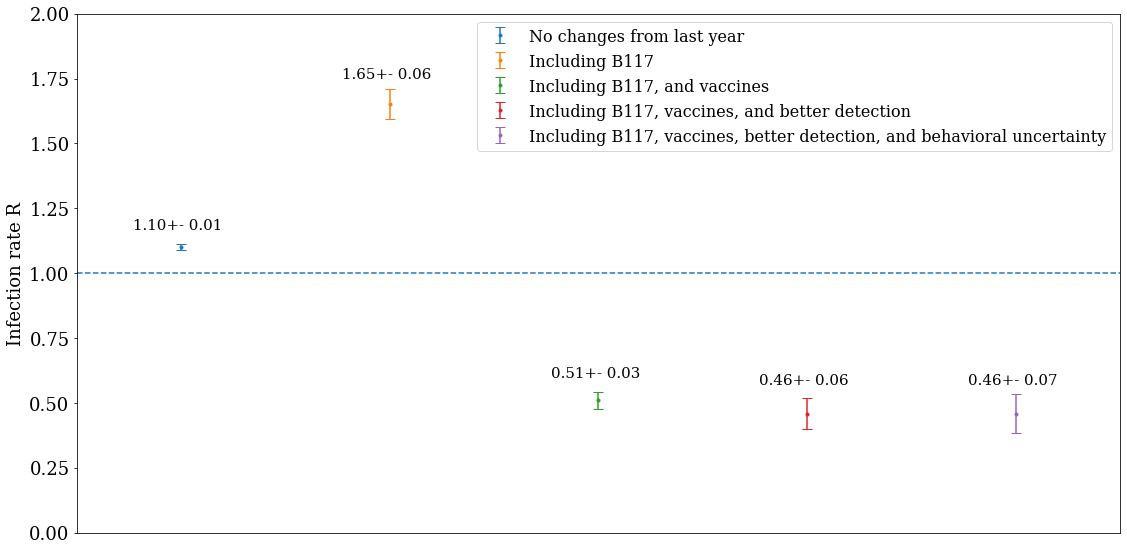

In [4]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.errorbar(0, R_last_fall, yerr=sR_last_fall, fmt='.', capsize=5,label = 'No changes from last year')
ax.errorbar(1, R_b117, yerr=sR_b117, fmt='.', capsize=5,label = 'Including B117')
ax.errorbar(2, R_b117_vacc, yerr=sR_b117_vacc, fmt='.', capsize=5,label = 'Including B117, and vaccines')
ax.errorbar(3, R_b117_vacc_smit, yerr=sR_b117_vacc_smit, fmt='.', capsize=5,label = 'Including B117, vaccines, and better detection')
ax.errorbar(4, R_next_fall, yerr=sR_next_fall, fmt='.', capsize=5,label = 'Including B117, vaccines, better detection, and behavioral uncertainty')
ax.set_ylim(0,2)
ax.set_xlim(-0.5,4.5)
ax.axes.get_xaxis().set_visible(False)
ax.set_ylabel('Infection rate R')
ax.legend(loc='upper right',fontsize=16)
ax.axhline(1,linestyle='--')

ax.text(-0.32, 1.17, f"{R_last_fall:8.2f}+-{sR_last_fall:5.2f}", fontsize=15)
ax.text(0.68, 1.75, f"{R_b117:8.2f}+-{sR_b117:5.2f}", fontsize=15)
ax.text(1.68, 0.6, f"{R_b117_vacc:8.2f}+-{sR_b117_vacc:5.2f}", fontsize=15)
ax.text(2.68, 0.57, f"{R_b117_vacc_smit:8.2f}+-{sR_b117_vacc_smit:5.2f}", fontsize=15)
ax.text(3.68, 0.57, f"{R_next_fall:8.2f}+-{sR_next_fall:5.2f}", fontsize=15)



plt.tight_layout()
plt.savefig('R_fall_prediction.png', dpi=300)